## <p style="text-align: center;">Numerical Algorithms - Homework Assignment 2</p>
**<p style="text-align: center;">VU Numerical Algorithms, summer semester 2018. Due to 21.05.2018. </p>**

### Paper-and-Pencil Exercises

**1.** _(2 points)_ We have discussed elementary elimination matrices $M_k$ in class. Prove the following two properties of elementary elimination matrices, which are very important for making LU factorization work efficiently in practice:
* $M_k$ is nonsingular. Represent $M_k^{−1}$ explicitly and show that $M_k M_k^{−1} = M_k^{−1} M_k = I$.
* The product of two elementary elimination matrices $M_k$ and $M_j$ with $k \leq j$ is essentially their "union"; and therefore they can be multiplied without any computational cost.

**Answer:**

_(1) Show that $M_kM_k^{-1} = M_k^{-1}M_k = I$._

Assumptions: $M_k$ is a lower triangular matrix.

1. Since $M_k = I - v_k e_k^T$ and because of our assumption, we can conclude that $v_k e_k^T$ is a strictly lower triangular matrix.
2. More specifically, due to the structure of $M_k$, $v_k e_k^T$ is a matrix that's equal to a zero matrix with variable values in one column $k$ under the diagonale.
3. We want to show that $M_kM_k^{-1} = M_k^{-1}M_k = I$. Hence:
$$
\begin{align}
M_kM_k^{-1} &= (I - v_k e_k^T)(I + v_k e_k^T) \\
&= I^2 - I * v_k e_k^T + I * v_k e_k^T - (v_k e_k^T)^2 \\
&= I - (v_k e_k^T)^2
\end{align}
$$
Note that $I = I^2$ and that $I * v_k e_k^T = v_k e_k^T$.
4. We know that $v_k e_k^T$ is a strictly lower triangular matrix with non-zero values in only one column (see statement 2.). That implies that multiplying a matrix in the form of $v_k e_k^T$ with any other matrix of this pattern leads to zero matrix, because at least one out of the two numbers involved in scalar multiplications in the dot product is zero and hence every vector dot product equals zero.

_(2) Show that the product of two elementary elimination matrices $M_k$ and $M_j$ with $k \leq j$ is essentially their "union"; and therefore they can be multiplied without any computational cost._

Assumptions:
* $k \leq j$.
* Multiplication sequence is $M_kM_j$.


1. Each elimination matrix $M_n$ is a diagonal matrix having non-zero values only on it's diagonale (which are exclusively ones) and below the diagonale in column $n$. Let $M_n^{i, j}$ be the value of $M_n$ in row $i$ and column $j$. Then:
$$
\begin{align}
    i < j \Rightarrow M_n^{i, j} &= 0 \\
    i = j \Rightarrow M_n^{i, j} &= 1
\end{align}
$$
2. Let $r$ be a row index and $c$ be a column index. Let $s_k$ be the set of indices $(r > k, c = k)$ of sub-diagonale entries in $M_k$ and $s_j$ be the set of indices $(r > j, c = j)$ of sub-diagonale entries in $M_j$.
3. Let $r_k$, $c_k$ be the current row and column indices in $M_k$. Let $r_j$, $c_j$ the current row and column indices in $M_j$. This leads to the following case distinction:
  
  (1.) $(r_k \leq k \lor c_k \neq k) \Rightarrow (r_k, c_k) \notin s_k$:
  
  (1a.)&nbsp;&nbsp;&nbsp;&nbsp;$r_k = k \land c_k = k$: Is an entry on the diagonale: $M_j^{r_j, c_j}$ is added to the dot product.
  
  (1b.)&nbsp;&nbsp;&nbsp;&nbsp; All other cases: Above the diagonale or below the diagonale in a column $c \neq k$ - in both cases, the scalar is 0, hence the corresponding term in the dot product is 0.
  
  (2.) $(r_k > k, c_k = k)\Rightarrow (r_k, c_k) \in s_k$: 
  
  (2a.)&nbsp;&nbsp;&nbsp;&nbsp;$(r_j, c_j) \in s_j$: Not possible, since it would contradict step 3.
 
  (2b.)&nbsp;&nbsp;&nbsp;&nbsp;$r_j = j \land c_j = j$: $M_j^{r_j, c_j}$ is on the diagonale and hence 1, therefore $M_k^{r_k, c_k}$ is added to dot product.
  
  (2c.)&nbsp;&nbsp;&nbsp;&nbsp;$\neg(r_j = j \land c_j = j) \land (r_j, c_j) \notin s_j$: $M_j^{r_j, c_j}$ is 0, therefore $M_k^{r_k, c_k}$ is 0.
  
4. Based on 4. and the definitions of a matrix multiplication and furthermore of the dot product, there is no dot product calculated during the computation of the matrix multiplication involving a multiplication $M_k^{a, b}M_j^{c, d}$ for which $(a, b) \in s_k \land (c, d) \in s_j$ holds.
    
5. Due to the structure of $M_k$ and $M_j$ and the relationships described in step 4., each dot product calculating a value in the resulting matrix $M_kM_j$ includes _exactly_ one non-zero term, i. e. $M_kM_j$ contains only values that appear in $M_k$ or $M_j$. 

6. According to steps 3. and 4., every non-zero term consists of at least one 1 (i. e. $1 * 1$ or $1 * x$).
7. Furthermore, each subdiagonal entry $\in s_k \lor \in s_j$ is part a non-zero term used for the dot product exactly once. 
8. If an element is a part of a non-zero term and $\in s_k \lor \in s_j$, it is (according to the definition of matrix multiplication and statements 1. to 7.) contained by
8. Based on statements 1. to 8. we conclude that
$$
M_kM_j = M_k \cup M_j
$$

**2.** _(2 points)_ We know that a matrix $A$ is singular if $det(A) = 0$. Can we also conclude that the determinant of a matrix is a good indicator of near singularity? In other words, does the magnitude of a nonzero determinant give any information about how close to singular the matrix is? 

Give a proof for your answer.

Hints: Experimental investigations may help for getting a first idea. It may also
help to consider simple cases, such as multiples of the identity matrix.

**Answer:**
 
We argue that $det(\kappa A) = \kappa^n det(A)$ holds, where $n$ is the dimension of the square matrix $A$ and $\kappa$ an arbitrary constant and that therefore $det(A)$ is not a good indicator for closeness to singularity (to this purpose, $cond(A)$ can be used).

Therefore, the determinant for any matrix can be arbitrarily increased or decreased independent from the content of this matrix. For illustration purposes see this chart of $det(\kappa I)$ with increasing $\kappa$ and $n=10$:

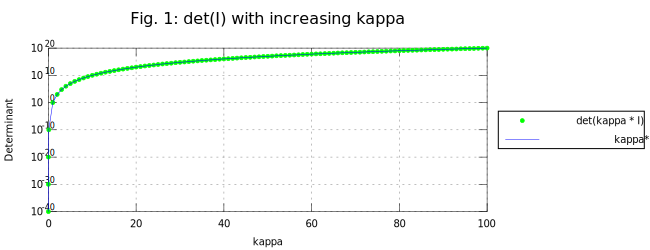

In [16]:
%plot -f svg

kappas = [0.0001 0.001 0.01 0.1 1:1:100];

A = eye(10);
detA = [];
detB = [];
for i = 1:1:size(kappas)(2)
    detA = [detA det(kappas(i) * A)];
    detB = [detB (kappas(i) ^ 10) * det(A)];
end

figure('Position',[0, 0, 650, 250])
grid on
hold on

semilogy(kappas, detA, '2; Residuals (fwd. substitution);.');
semilogy(kappas, detB, "markersize", 3, '3; Forward error (fwd. substitution);-');
    

legend ({
    "det(kappa * I)",
    "kappa^n * det(I)"
}, "location", "eastoutside")
title ("Fig. 1: det(I) with increasing kappa", "fontsize", 16);
xlabel("kappa");
ylabel("Determinant");

The determinant is still the definitive measure to determine whether matrices are singular or not - but on machines with finite precision rounding errors can produce misleading results, as can be seen above.

We now show that $det(\kappa A) = \kappa^n det(A)$.

1. The determinant of a matrix is calculated based on the permutations of all $[1...n]$, meaning that we end up with a sequence of terms that are each $n$ elements long. E.g.:
$$
det \left[{\begin{array}{ccccc}
   a_1 & a_2 & a_3 \\
   b_1 & b_2 & b_3 \\
   c_1 & c_2 & c_3
  \end{array} }\right] = a_1b_2c_3 - a_1b_3c_2 - a_2b_1c_3 + a_2b_3c_1 + a_3b_1c_2 - a_3b_2c_1
$$
2. All these terms are of length $n$.
3. To multiply a matrix $A$ with a constanst scalar $\kappa$, we multiply the scalar with all elements of $A$:
$$
\kappa \left[{\begin{array}{ccccc}
   a_1 & a_2 & a_3 \\
   b_1 & b_2 & b_3 \\
   c_1 & c_2 & c_3
  \end{array} }\right] = 
  \left[{\begin{array}{ccccc}
   \kappa a_1 & \kappa a_2 & \kappa a_3 \\
   \kappa b_1 & \kappa b_2 & \kappa b_3 \\
   \kappa c_1 & \kappa c_2 & \kappa c_3
  \end{array} }\right]
$$
4. Thus, every element of the matrix is increased by the factor $\kappa$. To continue the example from above:
$$
\begin{align}
    det(\kappa A) &= \kappa a_1 \kappa b_2 \kappa c_3 -  \kappa a_1 \kappa b_3 \kappa c_2 -  \kappa a_2 \kappa b_1 \kappa c_3 +  \kappa a_2 \kappa b_3 \kappa c_1 + a_3 \kappa b_1 \kappa c_2 -  \kappa a_3 \kappa b_2 \kappa c_1 \\
    &= \kappa^3 a_1b_2c_3 - \kappa^3 a_1b_3c_2 - \kappa^3 a_2b_1c_3 + \kappa^3 a_2b_3c_1 + \kappa^3 a_3b_1c_2 - \kappa^3 a_3b_2c_1 \\
    &= \kappa^3 (a_1b_2c_3 - a_1b_3c_2 - a_2b_1c_3 + a_2b_3c_1 + a_3b_1c_2 - a_3b_2c_1) \\
    &= \kappa^3 det(A)
\end{align}
$$
Speaking more generally: As illustrated in the last line in the example above, $det(\kappa A) = \kappa^n det(A)$ holds assuming $det(A)$ is always a sum of terms with $n$ variables each, which is the case according to its definition.

This shows that $det(A)$ can be arbitrarily scaled independently from the conditioning of $A$. Thus, the magnitude of a nonzero determinant is not a good indicator for the closeness of a matrix to singularity.

### Programming Exercises

** PR I - Condition Estimation ** _(5 points)_

Implement the randomized estimator introduced in the lecture for the 1-norm condition number of square $n × n$ matrices and compare its results for varying dimensions up to $n = 500$ (random matrices) with the Octave functions `cond` and `condest`. 

For fixed $n \in {5, 10, 100}$ investigate how the number of random vectors generated influences the quality of the approximation, by plotting the relative error of the estimated condition number.

Illustrate your results graphically. If your data is too noisy, average over a few iterations.<br/>
What are your conclusions? Is this a practical way for condition number estimation?

**Answer:**

_Part 1_: See figure 2 for a plot of the behaviour of the condition number of a random matrix $A$ (generated with `rand()`) with dimension $n \leq 500$. The chart also includes a comparison with the built-in `condest()` and the manual implementation of a randomized condition number estimation approach<sup>1</sup>.  
While `condest()` yields a very close approximation, the manual implementation is significantly off - usually by one order of magnitude. This might be sufficient for a crude lower bound of $cond(A)$ but leaves plenty of room for improvement. The manually implemented stochastic approximation shows the same behaviour as $cond(A)$ though. 

Also, $cond(A)$ seems to rise exponentially with the $n$ for small matrices until it saturates and reaches a plateau.


_Part 2_: See figure 3 for the corresponding plot. We conclude that the benefit of increasing the number of picked random vectors $y$ is correlated with the size of the matrix - the smaller $n$, the more a higher number of randomly selected vectors can contribute. With bigger matrices, visible already for $n = 100$, we can't significantly improve on the accuracy of the condition number approximation.

One explanation that applies to part 2 and, to a lesser extent, also to part 1: The approach implemented for this exercise generates random vectors of length $n$ (the dimension of the matrix $A$). In order to achieve a close approximation, $\frac{||z||}{||y||}$ has to be as large as possible - which implies $||y||$ has to be as small as possible and at the same time $z$ in $Az=y$ ought to be maximized. Since we rely on a purely randomized approach with the generated vectors for $y$ being independent from each other, the probability of a random vector fulfilling both these conditions decreases with increasing $n$.

_Conclusio_: The approach implemented for this task is not practical for applications beyond toy datasets. Octave's `condest()` shows that randomized estimations of the condition number can work quite well, but this requires additional measures not included in the naive approach used here.

<sup>1</sup>: The result for the procedure calculating the manually implemented random approximation was averaged over five executions to reduce the noisiness in the data. 

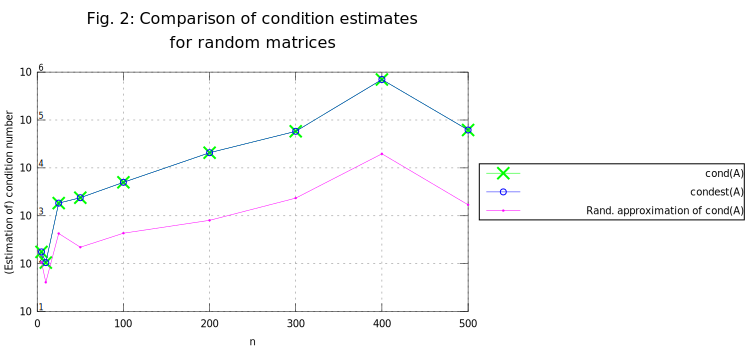

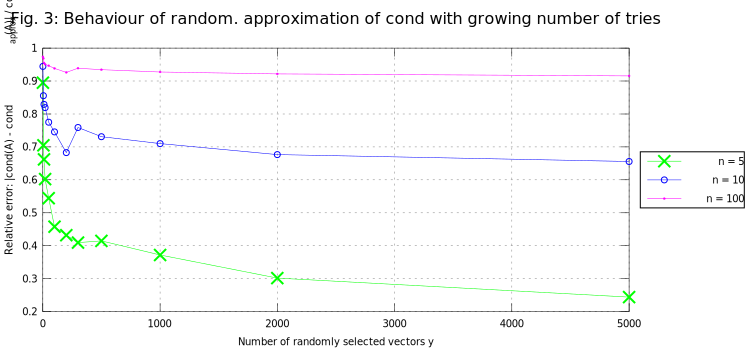

In [39]:
%plot -f svg

# Import routines needed to execute assignment.
source("source/assignment2.m")

# Execute PR1.
executePart1()